In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [3]:
os.path.exists(r"C:\Users\91852\Downloads\Bookings.csv")
df = pd.read_csv(r"C:\Users\91852\Downloads\Bookings.csv")
df.head(3)

,Date,Time,Booking_ID,Booking_Status,Customer_ID,Vehicle_Type,Pickup_Location,Drop_Location,V_TAT,C_TAT,Canceled_Rides_by_Customer,Canceled_Rides_by_Driver,Incomplete_Rides,Incomplete_Rides_Reason,Booking_Value,Payment_Method,Ride_Distance,Driver_Ratings,Customer_Rating
0,26-07-2024 14:00,0.583333,CNR7153255142,Canceled by Driver,CID713523,Prime Sedan,Tumkur Road,RT Nagar,NaN,NaN,NaN,Personal & Car related issue,NaN,NaN,444,NaN,0,NaN,NaN
1,25-07-2024 22:20,0.930556,CNR2940424040,Success,CID225428,Bike,Magadi Road,Varthur,203.0,30.0,NaN,NaN,No,NaN,158,Cash,13,4.1,4.0
2,30-07-2024 19:59,0.832639,CNR2982357879,Success,CID270156,Prime SUV,Sahakar Nagar,Varthur,238.0,130.0,NaN,NaN,No,NaN,386,UPI,40,4.2,4.8


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103024 entries, 0 to 103023
Data columns (total 19 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Date                        103024 non-null  object 
 1   Time                        103024 non-null  float64
 2   Booking_ID                  103024 non-null  object 
 3   Booking_Status              103024 non-null  object 
 4   Customer_ID                 103024 non-null  object 
 5   Vehicle_Type                103024 non-null  object 
 6   Pickup_Location             103024 non-null  object 
 7   Drop_Location               103024 non-null  object 
 8   V_TAT                       63967 non-null   float64
 9   C_TAT                       63967 non-null   float64
 10  Canceled_Rides_by_Customer  10499 non-null   object 
 11  Canceled_Rides_by_Driver    18434 non-null   object 
 12  Incomplete_Rides            63967 non-null   object 
 13  Incomplete_Rid

In [5]:
df.shape

(103024, 19)

In [ ]:
# check null values in each columns
df.isnull().sum()


Date                              0
Time                              0
Booking_ID                        0
Booking_Status                    0
Customer_ID                       0
Vehicle_Type                      0
Pickup_Location                   0
Drop_Location                     0
V_TAT                         39057
C_TAT                         39057
Canceled_Rides_by_Customer    92525
Canceled_Rides_by_Driver      84590
Incomplete_Rides              39057
Incomplete_Rides_Reason       99098
Booking_Value                     0
Payment_Method                39057
Ride_Distance                     0
Driver_Ratings                39057
Customer_Rating               39057
dtype: int64

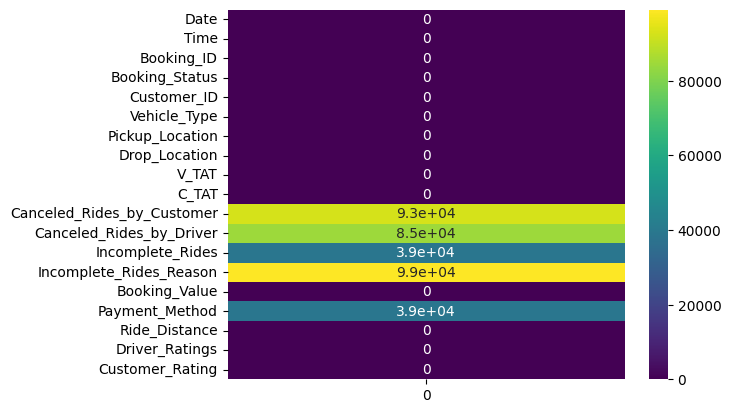

In [ ]:
# checky null by map
sns.heatmap(df.isnull().sum().to_frame(), annot=True, cmap="viridis")
plt.show()

In [9]:
# check total number od null values
df.isnull().sum().sum()

np.int64(510555)

In [ ]:
# showing the percentage of missing values in each column
df.isnull().sum()/df.shape[0]*100

Date                           0.000000
Time                           0.000000
Booking_ID                     0.000000
Booking_Status                 0.000000
Customer_ID                    0.000000
Vehicle_Type                   0.000000
Pickup_Location                0.000000
Drop_Location                  0.000000
V_TAT                         37.910584
C_TAT                         37.910584
Canceled_Rides_by_Customer    89.809171
Canceled_Rides_by_Driver      82.107082
Incomplete_Rides              37.910584
Incomplete_Rides_Reason       96.189237
Booking_Value                  0.000000
Payment_Method                37.910584
Ride_Distance                  0.000000
Driver_Ratings                37.910584
Customer_Rating               37.910584
dtype: float64

In [ ]:
# overall percentage of missing data
df.isnull().sum().sum()/(df.shape[1]*df.shape[0])*100

np.float64(26.08257861223956)

In [41]:
# fill nulls with mean
df['V_TAT'].mean()
df["V_TAT"].fillna(df['V_TAT'].mean(),inplace=True)
df["V_TAT"].isna().sum()

C:\Users\91852\AppData\Local\Temp\ipykernel_20292\2614124042.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["V_TAT"].fillna(df['V_TAT'].mean(),inplace=True)


np.int64(0)

In [ ]:
# fill nulls with the help of mean in selected data types where we see nulls
df.select_dtypes(include=["float64","int64"]).columns
df[df.select_dtypes(include=["float64","int64"]).columns].mean()
df[df.select_dtypes(include=["float64","int64"]).columns].fillna(df[df.select_dtypes(include=["float64","int64"]).columns].mean(),inplace=True)
df.select_dtypes(include=["float64","int64"]).isnull().values.any()

C:\Users\91852\AppData\Local\Temp\ipykernel_20292\3522830857.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[df.select_dtypes(include=["float64","int64"]).columns].fillna(df[df.select_dtypes(include=["float64","int64"]).columns].mean(),inplace=True)


np.False_

In [60]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

mean_values = df[numeric_cols].mean()

df[numeric_cols] = df[numeric_cols].fillna(mean_values)

null_counts = df[numeric_cols].isnull().sum()

null_counts = null_counts[null_counts > 0]

if null_counts.empty:
    print("No nulls")
else:
    plt.figure(figsize=(10, 6))
    sns.barplot(x=null_counts.index, y=null_counts.values, palette="viridis")
    plt.title('Remaining Null Values in Numeric Columns (float64, int64)', fontsize=14)
    plt.xlabel('Column Name', fontsize=12)
    plt.ylabel('Count of Null Values', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.savefig('remaining_null_counts.png')
    plt.close()
    print("A bar chart showing 'remaining_null_counts.png' has been generated.")
    print("If this chart is blank, your mean imputation was fully successful.")

No nulls


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103024 entries, 0 to 103023
Data columns (total 19 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Date                        103024 non-null  object 
 1   Time                        103024 non-null  float64
 2   Booking_ID                  103024 non-null  object 
 3   Booking_Status              103024 non-null  object 
 4   Customer_ID                 103024 non-null  object 
 5   Vehicle_Type                103024 non-null  object 
 6   Pickup_Location             103024 non-null  object 
 7   Drop_Location               103024 non-null  object 
 8   V_TAT                       103024 non-null  float64
 9   C_TAT                       103024 non-null  float64
 10  Canceled_Rides_by_Customer  10499 non-null   object 
 11  Canceled_Rides_by_Driver    18434 non-null   object 
 12  Incomplete_Rides            63967 non-null   object 
 13  Incomplete_Rid

In [68]:
# check null values in object type data
df.select_dtypes(include="object").isnull().sum()
df.select_dtypes(include="object").isnull().sum().sum()

np.int64(354327)

C:\Users\91852\AppData\Local\Temp\ipykernel_20292\3444515140.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=obj_null.index, y=obj_null.values, palette='mako')


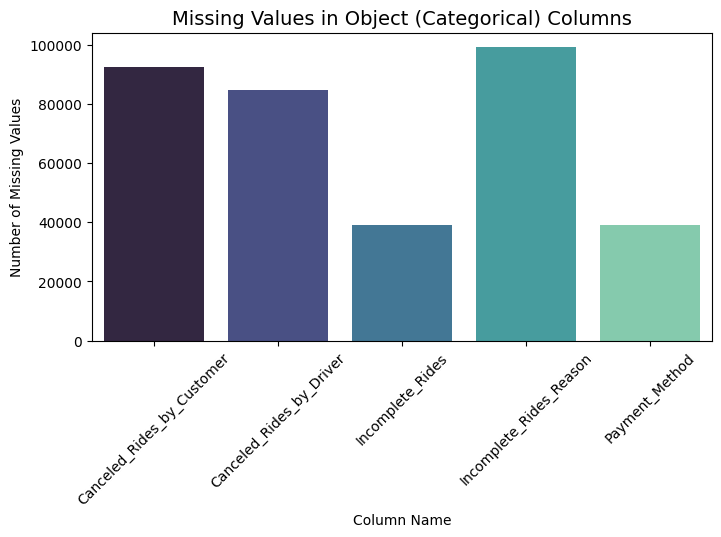

In [ ]:
# see null values in a barplot
import seaborn as sns
import matplotlib.pyplot as plt

obj_null = df.select_dtypes(include='object').isnull().sum()

obj_null = obj_null[obj_null > 0]

plt.figure(figsize=(8, 4))
sns.barplot(x=obj_null.index, y=obj_null.values, palette='mako')
plt.title('Missing Values in Object (Categorical) Columns', fontsize=14)
plt.xlabel('Column Name')
plt.ylabel('Number of Missing Values')
plt.xticks(rotation=45)
plt.show()


In [ ]:
# fill null values with the help of mode in object data type
df.select_dtypes(include=["object"]).columns
df[df.select_dtypes(include=["object"]).columns].mode()
df[df.select_dtypes(include=["object"]).columns].fillna(df[df.select_dtypes(include=["object"]).columns].mode(),inplace=True)
df.select_dtypes(include=["object"]).isnull().values.any()

C:\Users\91852\AppData\Local\Temp\ipykernel_20292\1182411102.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[df.select_dtypes(include=["object"]).columns].fillna(df[df.select_dtypes(include=["object"]).columns].mode(),inplace=True)


np.True_

In [78]:


numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
mean_values = df[numeric_cols].mean()
df[numeric_cols] = df[numeric_cols].fillna(mean_values)

null_counts = df[numeric_cols].isnull().sum()
null_counts = null_counts[null_counts > 0]

if null_counts.empty:
    print(" No null values remaining in numeric columns. Mean imputation successful!")
else:
    plt.figure(figsize=(10, 6))
    sns.barplot(x=null_counts.index, y=null_counts.values, palette="viridis")
    plt.title('Remaining Null Values in Numeric Columns (float64, int64)', fontsize=14)
    plt.xlabel('Column Name', fontsize=12)
    plt.ylabel('Count of Null Values', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.savefig('remaining_null_counts.png', dpi=300)
    plt.close()
    print("A bar chart ('remaining_null_counts.png') has been generated.")
    print("If this chart is blank, your mean imputation was fully successful.")


 No null values remaining in numeric columns. Mean imputation successful!


In [81]:
obj_nulls = df.select_dtypes(include='object').isnull().sum()
obj_nulls = obj_nulls[obj_nulls > 0]
obj_nulls
text_cols = df.select_dtypes(include=['object', 'string', 'category']).columns

for col in text_cols:
    if df[col].isnull().sum() > 0:
        if not df[col].mode().empty:
            df[col] = df[col].fillna(df[col].mode()[0])
        else:
            df[col] = df[col].fillna("Unknown")




In [82]:
df.select_dtypes(include=['object', 'string', 'category']).isnull().sum().sum()


np.int64(0)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only object/string/category columns
obj_cols = df.select_dtypes(include=['object', 'string', 'category'])

# Count null values in those columns
obj_null = obj_cols.isnull().sum()
obj_null = obj_null[obj_null > 0]

# Plot the bar graph if any nulls exist
if not obj_null.empty:
    plt.figure(figsize=(10, 5))
    sns.barplot(x=obj_null.index, y=obj_null.values, palette='mako')
    plt.title('Null Values in Object Columns', fontsize=14)
    plt.xlabel('Column Name', fontsize=12)
    plt.ylabel('Count of Null Values', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
else:
    print(" No null values found in object-type columns.")


✅ No null values found in object-type columns.


In [ ]:
# finall check is there any null values
df.isnull().sum().sum()

np.int64(0)